## **Exercise 1**
<!-- @q -->

Following from last week, we'll use the `moons` dataset to explore the performance of the SVC classifier. The following just sets up the code.

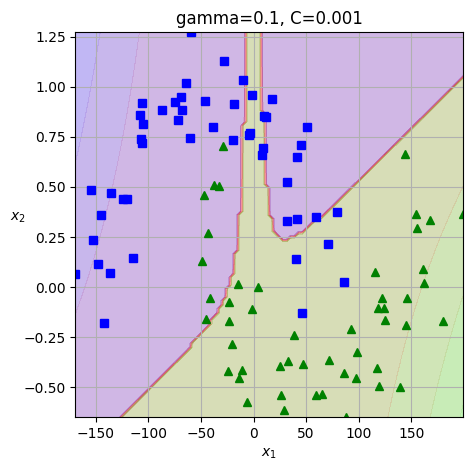

In [3]:
# @SHOW
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
X[:,0] = X[:,0]*100 - 42

def get_extents(X):
    return [np.min(X[:,0]),np.max(X[:,0]),np.min(X[:,1]),np.max(X[:,1])]

def plot_dataset(X, y, axes = None):
    if axes is None:
        axes = get_extents(X)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plot_predictions(clf, axes):    
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

gamma = 0.1
C = 0.001

svm_clf = SVC(kernel="poly",gamma = gamma, C = C)
svm_clf.fit(X, y)

plt.figure(figsize=(5,5))
plot_predictions(svm_clf,get_extents(X))
plot_dataset(X, y)
plt.title(f"gamma={gamma}, C={C}")
plt.show()

### Part 1: Standard Scalar implementation


Use a standard scaler to scale the data before running the classifier. Use the dataset generated above (which has been deliberately skewed).  Fit using the same parameters as with the code above.

In [ ]:
# Your code here


What do you think?  Does scaling matter here?  Why or why not?

*Enter your answer in this cell*

#### Part 2: Different settings for `C` and `gamma`



Run the SVC classifier (using the poly kernel) on the same dataset (with scaling) over a range of parameters. Determine which parameter combination is best, and visualize each parameter combination to get a sense of what they are doing?

In [ ]:
from sklearn.metrics import f1_score

C_values = [0.001, 0.01, 0.1, 1, 10]
gamma_values = [0.001, 0.01, 0.1, 1, 10]

# Initialize tracking variables
best_C = None
best_gamma = None
best_f1 = 0
best_accuracy = 0

# TODO: Replace with your code (fill)

print(f"\nBest parameters based on F1 score:")
print(f"Best C: {best_C}, Best gamma: {best_gamma}")
print(f"Best F1 Score: {best_f1:.3f}, Accuracy: {best_accuracy:.3f}")


What is the impact of C? What is the impact of gamma? Which setting works the best? Why? What do you think would happen if you added more noise?

*Enter your answer in this cell*

#### Part 3: RBF Kernel


Try running the classifier with an `rbf` kernel using `gamma = 0.1` and `C = 0.001`. Check your accuracy with crossfold validation and plot your results.

In [ ]:
# Your code here


How does the RBF kernel do with these parameters?

*Enter your answer in this cell*

Try running with rbf kernel over a range parameter values as above.  Make sure to visually inspect your fit.

In [ ]:
from sklearn.metrics import f1_score

C_values = [0.001, 0.01, 0.1, 1, 10]
gamma_values = [0.001, 0.01, 0.1, 1, 10]

# Initialize tracking variables
best_C = None
best_gamma = None
best_f1 = 0
best_accuracy = 0

# TODO: Replace with your code (fill)

print(f"\nBest parameters based on F1 score:")
print(f"Best C: {best_C}, Best gamma: {best_gamma}")
print(f"Best F1 Score: {best_f1:.3f}, Accuracy: {best_accuracy:.3f}")

How does the `rbf` kernel compare to the `poly` kernel?

*Enter your answer in this cell*

## **Exercise 2**
<!-- @q -->

The [Federalist Papers](https://www.gutenberg.org/ebooks/18_) are a set of documents written by Alexander Hamilton, John Jay, and James Madison.  One commonly use data analytics example involves trying to infer the authorship for a set of papers with 'disputed' provenance based on the frequency of terms used in the documents (there is a copy in the data folder).

Use at least two different models (e.g., SVC and KNN) to predict the disputed papers. Be sure to split the test data (marked 'dispt') out of the data before training your model. Who do you think the disputed papers were written by? Which model do you think is the best?

#### Step 1


Load the data and have a look at it.  Pull out the disputed data for subsequent testing; scale all of your data with a standard scaler and encode the "author" column using a `LabelEncoder`.

In [ ]:
# Your code here


In [ ]:
# Your code here


#### Step 2


Build an SVC classifier and a KNN classifier, and calculate mean accuracy using 5-fold cross-validation.

In [ ]:
# Your code here


#### Step 3

Now train both classifiers on all of the data and use them to predict the disputed papers.  Print out the predictions for each of the disputed papers.

In [ ]:
# Your code here


Which algorithm do you have more confidence in here? Who do you think wrote the disputed papers?  Why?

*Enter your answer in this cell*

### **Exercise 3: Working with decision trees**
<!-- @q -->

Use a decision tree to model the data generated in the following cell.

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Generate synthetic dataset
X, y = make_classification(
    n_samples=400, n_features=20, n_informative=2, n_redundant=15, n_classes=2, random_state=42, flip_y=0.07
)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Train a decision tree classifier and print out the average accuracy of a 5-fold cross-validation test

# TODO: Replace with your code (fill)

### **Step 2: Visualizing a Decision Tree**


Train another tree on the preceding data using a decision tree with depth 3, and then visualize the tree.

In [ ]:
# Your code here


In your own words, explain what the top level feature (the root node) means.

*Enter your answer in this cell*

### **Step 3: Consider tree depth**


Train two decision trees on the preceding data: one with `max_depth=None` (unrestricted depth) and another with `max_depth=3`.
Compare their test set performance using cross-validation.

In [ ]:
# Your code here


Which tree performs better?  Why?

*Enter your answer in this cell*